#  Read and Write SEG-Y File

## SEG-Y format


SEGY, SEG Y, or SEG-Y, pronounced 'segg why', is a seismic data file format. The name stands for the Society of Exploration Geophysicists 'Y' format. The first rule of the SEG-Y format is that no-one follows the SEG-Y format (http://subsurfwiki.org/wiki/SEG_Y).

SEG-Y means seismic data. For many of us, it's the only type of seismic file we have much to do with — we might handle others, but for the most part they are closed, proprietary formats that 'just work' in the application they belong to (Landmark's brick files, say, or OpendTect's CBVS files). Processors care about other kinds of data — the SEG has defined formats for field data (SEG-D) and positional data (SEG-P), for example. But SEG-Y is the seismic file for everyone. Kind of.

The open SEG-Y "standard" (those air quotes are an important feature of the standard) was defined by SEG in 1975. The first revision, Rev 1, was published in 2002. The second revision, Rev 2, was announced by the SEG Technical Standards Committee at the SEG Annual Meeting in 2013 and I imagine we'll start to see people using it in 2014.

In this tutorial, we only cover Rev 1 format. Refer to https://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev1.pdf for detailed information.

### SEG-Y headers

A typical SEG-Y file contains three headers, i.e. 3200-byte textual header, 400-byte binary volume header and 240-byte binary trace header for each trace.

#### Textual header

The 3200-byte text file header can be ASCII encoded, not only EBCDIC.


In [1]:
SEGY_ASCII_REEL_HEADER_BYTES=3200

#### Volume header

The 400-byte volume headers contains many important items for correctly reading a SEG-Y file. Users must coorectly read in the exact data type in exact byte position. 

We define the position and data type of the volume header as follows:

In [2]:
import numpy as np
import pandas as pd

VOLUME_HEADER_TYPE = np.dtype([('Job', '>i4'),\
                            ('Line', '>i4'),\
                            ('Reel', '>i4'),\
                            ('DataTracePerEnsemble', '>i2'),\
                            ('AuxiliaryTracePerEnsemble', '>i2'),\
                            ('dt', '>u2'),\
                            ('dtOrig', '>u2'),\
                            ('ns', '>u2'),\
                            ('nsOrig', '>u2'),\
                            ('DataSampleFormat', '>i2'),\
                            ('EnsembleFold', '>i2'),\
                            ('TraceSorting', '>i2'),\
                            ('VerticalSumCode', '>i2'),\
                            ('SweepFrequencyStart', '>i2'),\
                            ('SweepFrequencyEnd', '>i2'),\
                            ('SweepLength', '>i2'),\
                            ('SweepType', '>i2'),\
                            ('SweepChannel', '>i2'),\
                            ('SweepTaperlengthStart', '>i2'),\
                            ('SweepTaperLengthEnd', '>i2'),\
                            ('TaperType', '>i2'),\
                            ('CorrelatedDataTraces', '>i2'),\
                            ('BinaryGain', '>i2'),\
                            ('AmplitudeRecoveryMethod', '>i2'),\
                            ('MeasurementSystem', '>i2'),\
                            ('ImpulseSignalPolarity', '>i2'),\
                            ('VibratoryPolarityCode', '>i2')                            
                            ])


    
print(pd.DataFrame(list(VOLUME_HEADER_TYPE.fields.items()),columns=['Description','(Type, Number of Bytes)']))

                  Description (Type, Number of Bytes)
0                         Job                (>i4, 0)
1                        Line                (>i4, 4)
2                        Reel                (>i4, 8)
3        DataTracePerEnsemble               (>i2, 12)
4   AuxiliaryTracePerEnsemble               (>i2, 14)
5                          dt               (>u2, 16)
6                      dtOrig               (>u2, 18)
7                          ns               (>u2, 20)
8                      nsOrig               (>u2, 22)
9            DataSampleFormat               (>i2, 24)
10               EnsembleFold               (>i2, 26)
11               TraceSorting               (>i2, 28)
12            VerticalSumCode               (>i2, 30)
13        SweepFrequencyStart               (>i2, 32)
14          SweepFrequencyEnd               (>i2, 34)
15                SweepLength               (>i2, 36)
16                  SweepType               (>i2, 38)
17               SweepChanne

#### Volume header

We define the position and data type of the 240-byte trace headers as follows:

In [3]:

TRACES_HEADER_TYPE = np.dtype( [ ('TraceSequenceLine' , '>i4'), \
                                ('TraceNumber' , '>i4'), \
                                ('FieldRecord' , '>i4'), \
                                 ('TraceSequenceFile' , '>i4'),\
                                 ('EnergySourcePoint' , '>i4'), \
                                 ('cdp' , '>i4'), \
                                ('cdpTrace' , '>i4'), \
                                ('TraceIdentificationCode' , '>u2'), \
                                ('NSummedTraces' , '>u2'), \
                                ('NStackedTraces' , '>u2'), \
                                ('DataUse' , '>u2'),\
                                ('offset' , '>i4'), \
                                ('ReceiverGroupElevation' , '>i4'), \
                                ('SourceSurfaceElevation' , '>i4'), \
                                ('SourceDepth' , '>i4'), \
                                ('ReceiverDatumElevation' , '>i4'), \
                                ('SourceDatumElevation' , '>i4'), \
                                ('SourceWaterDepth' , '>i4'), \
                                ('GroupWaterDepth' , '>i4'),\
                                ('ElevationScalar' , '>i2'), \
                                ('SourceGroupScalar' , '>i2'), \
                                ('SourceX' , '>i4'), \
                                ('SourceY' , '>i4'), \
                                ('GroupX' , '>i4'), \
                                ('GroupY' , '>i4'), \
                                ('CoordinateUnits' , '>u2'),\
                                ('WeatheringVelocity' , '>u2'), \
                                ('SubWeatheringVelocity' , '>u2'), \
                                ('SourceUpholeTime' , '>u2'), \
                                ('GroupUpholeTime' , '>u2'), \
                                ('SourceStaticCorrection' , '>u2'), \
                                ('GroupStaticCorrection' , '>u2'), \
                                ('TotalStaticApplied' , '>u2'), \
                                ('LagTimeA' , '>i2'), \
                                ('LagTimeB' , '>i2'), \
                                ('DelayRecordingTime' , '>i2'), \
                                ('MuteTimeStart' , '>u2'), \
                                ('MuteTimeEND' , '>u2'), \
                                ('ns' , '>u2'), \
                                ('dt' , '>u2'), \
                                ('GainType' , '>u2'), \
                                ('InstrumentGainConstant' , '>u2'), \
                                ('InstrumentInitialGain' , '>u2'), \
                                ('Correlated' , '>u2'), \
                                ('SweepFrequenceStart' , '>u2'), \
                                ('SweepFrequenceEnd' , '>u2'), \
                                ('SweepLength' , '>u2'), \
                                ('SweepType' , '>u2'), \
                                ('SweepTraceTaperLengthStart' , '>u2'), \
                                ('SweepTraceTaperLengthEnd' , '>u2'), \
                                ('TaperType' , '>u2'), \
                                ('AliasFilterFrequency' , '>u2'), \
                                ('AliasFilterSlope' , '>u2'), \
                                ('NotchFilterFrequency' , '>u2'), \
                                ('NotchFilterSlope' , '>u2'), \
                                ('LowCutFrequency' , '>u2'), \
                                ('HighCutFrequency' , '>u2'), \
                                ('LowCutSlope' , '>u2'), \
                                ('HighCutSlope' , '>u2'), \
                                ('YearDataRecorded' , '>u2'), \
                                ('DayOfYear' , '>u2'), \
                                ('HourOfDay' , '>u2'), \
                                ('MinuteOfHour' , '>u2'), \
                                ('SecondOfMinute' , '>u2'), \
                                ('TimeBaseCode' , '>u2'), \
                                ('TraceWeightningFactor' , '>u2'), \
                                ('GeophoneGroupNumberRoll1' , '>u2'), \
                                ('GeophoneGroupNumberFirstTraceOrigField' , '>u2'), \
                                ('GeophoneGroupNumberLastTraceOrigField' , '>u2'), \
                                ('GapSize' , '>u2'), \
                                ('OverTravel' , '>u2'),\
                                ('cdpX' , '>i4'),\
                                ('cdpY' , '>i4'),\
                                ('Inline3D' , '>i4'),\
                                ('Crossline3D' , '>i4'),\
                                ('ShotPoint' , '>i4'),\
                                ('ShotPointScalar' , '>i2'),\
                                ('TraceValueMeasurementUnit' , '>u2'),\
                                ('TransductionConstantMantissa' , '>i4'),\
                                ('TransductionConstantPower' , '>u2'),\
                                ('TransductionUnit' , '>u2'),\
                                ('TraceIdentifier' , '>u2'),\
                                ('ScalarTraceHeader' , '>i2'),\
                                ('SourceType' , '>u2'),\
                                ('SourceEnergyDirectionMantissa' , '>i4'),\
                                ('SourceEnergyDirectionExponent' , '>u2'),\
                                ('SourceMeasurementMantissa' , '>i4'),\
                                ('SourceMeasurementExponent' , '>u2'),\
                                ('SourceMeasurementUnit' , '>u2'),\
                                ('UnassignedInt1' , '>i4'),\
                                ('UnassignedInt2' , '>i4')])
                                

In [4]:
    
print(pd.DataFrame(list(TRACES_HEADER_TYPE.fields.items()),columns=['Description','(Type, Number of Bytes)']))


                               Description (Type, Number of Bytes)
0                        TraceSequenceLine                (>i4, 0)
1                              TraceNumber                (>i4, 4)
2                              FieldRecord                (>i4, 8)
3                        TraceSequenceFile               (>i4, 12)
4                        EnergySourcePoint               (>i4, 16)
5                                      cdp               (>i4, 20)
6                                 cdpTrace               (>i4, 24)
7                  TraceIdentificationCode               (>u2, 28)
8                            NSummedTraces               (>u2, 30)
9                           NStackedTraces               (>u2, 32)
10                                 DataUse               (>u2, 34)
11                                  offset               (>i4, 36)
12                  ReceiverGroupElevation               (>i4, 40)
13                  SourceSurfaceElevation               (>i4,

## Python packages for SEG-Y I/O

There are many Python packages that specialize in SEG-Y reading and writing. The following open-source packages are recommended:

1. ObsPy - A Python Toolbox for seismology/seismological observatories (https://github.com/obspy/obspy)
2. Segpy 2 - A Python package for reading and writing SEG Y files. (https://github.com/sixty-north/segpy)
3. segyio - Python library for SEGY files. (https://github.com/equinor/segyio)

To better illustrate how to read and write SEG-Y files in this tutorial, we build our own SEG-Y I/O functions (stored in segylib.py) from scratch. Different from the above three packages, we use Numpy based data structure/type to implement a series of pure Python functions to read and write SEG-Y files with fast speed.

The performance speed has been test on on benchmark dataset (refer to 'Seismic data set') and compared to the above three packages. Results are as follows:

* SegyIO:     6.23s (written in C with a Python wrapper, most fast one)
* SegyReader: 13.12s
* Obspy:      154.22s
* Segpy 2:    843.50s 



In [7]:
ROOT = 'F:/Github/Programming-Geophysics-in-Python/Datasets'
%pwd
import os

## Seismic data set

In this tutorial, we use the raw seismic data of Project Netherlands Offshore F3 Block (https://terranubis.com/datainfo/Netherlands-Offshore-F3-Block-Complete) from Open Seismic Repository (OSR). OSR is a dGB initiative to make public data sets readily available for R&D and education. For more information, please visit:
https://www.dgbes.com/index.php/data

We have exported a portion of seismic data from the '1_Original_Seismic.cbvs' in the OpendTect project provided by dGB Earth Sciences and put it in the 'Datasets/F3' folder with name 'f3_seismic.sgy'.

Data ranges are as follows:
Inline range: 300-500, interval 1
Crossline range: 600-800, interval 1
Time range: 1500-1512, interval 4

## Reading SEG-Y file

Firstly, we write a function based on Numpy array and dtype to load SEG-Y headers and trace data.


In [8]:
SEGY_ASCII_REEL_HEADER_BYTES=3200
SEGY_ASCII_REEL_HEADER_RECORD_BYTES=80
SEGY_BIN_REEL_HEADER_BYTES=400


TRACES_TRACE_TYPE =  np.dtype('>f4')
TRACES_TRACE_TYPE.newbyteorder('>')
TRACES_HEADER_TYPE.newbyteorder('>')

TRACES_HEADER_BYTES = TRACES_HEADER_TYPE.itemsize
TRACES_TRACE_BYTES = TRACES_TRACE_TYPE.itemsize


def readSegy(filename):
    fs=open(filename,'rb')
    vheaders=[] # volume header
    theaders = [] # trace header
    traces=[] # trace data
    nt=0
    
    # Read in 400-byte volume header
    # first we need to jump over the textual headers:    
    fs.seek(SEGY_ASCII_REEL_HEADER_BYTES)  
    l=fs.read(60) # only read in the first 60-byte valuable information
    if len(l) == 60:
        rec=np.frombuffer(l, VOLUME_HEADER_TYPE)
        vheaders.append(rec)
        
    # Read in 240-byte traxce header and trace data   
    fs.seek(0)  
    fs.seek(SEGY_ASCII_REEL_HEADER_BYTES + SEGY_BIN_REEL_HEADER_BYTES)
    
    
    while True:
        l=fs.read(TRACES_HEADER_BYTES)
        if len(l) == TRACES_HEADER_BYTES:
            rec=np.frombuffer(l, TRACES_HEADER_TYPE)
            ns=rec['ns'][0]
            #print(ns)
            trcstr=fs.read(ns *TRACES_TRACE_BYTES )
            theaders.append(rec)
            traces.append(np.frombuffer( trcstr, TRACES_TRACE_TYPE ))
            nt+=1
        else:
            break
    print("%s record read."%nt)

    vheaders=np.stack(vheaders).reshape(-1)
    theaders=np.stack(theaders).reshape(-1)
    traces=np.stack(traces, axis = 1)
    
    # convert headers to dict
    vhead = {}
    for key in VOLUME_HEADER_TYPE.names:        

        vhead[key] = vheaders[key][0]
        
    thead = {}
    for key in TRACES_HEADER_TYPE.names:        

        thead[key] = theaders[key]
        
    return traces, vhead, thead


Second, we use the above function to load a SEG-Y file.

In [9]:
segy_file = os.path.join(ROOT,'F3/f3_seismic.sgy')

traces, volume_header, trace_header = readSegy(segy_file)

print('\nTotal number of traces: ', traces.shape[1])
print('\nNumber of samples per trace: ', traces.shape[0])



600515 record read.

Total number of traces:  600515

Number of samples per trace:  463


Let's also have a look at the trace header information.

## Show SEG-Y Header Info
### Key parameters from volume header

Let's check the binary volume header information.


In [10]:
print('=== BEGIN BINARY REEL HEADER ===')
print(pd.DataFrame(volume_header,index = [0],columns=volume_header.keys()))
print('=== END BINARY REEL HEADER ===')

=== BEGIN BINARY REEL HEADER ===
   Job  Line  Reel  DataTracePerEnsemble  AuxiliaryTracePerEnsemble    dt  \
0    2     0     0                     0                          0  4000   

   dtOrig   ns  nsOrig  DataSampleFormat          ...            SweepChannel  \
0       0  463       0                 5          ...                       0   

   SweepTaperlengthStart  SweepTaperLengthEnd  TaperType  \
0                      0                    0          0   

   CorrelatedDataTraces  BinaryGain  AmplitudeRecoveryMethod  \
0                     0           0                        0   

   MeasurementSystem  ImpulseSignalPolarity  VibratoryPolarityCode  
0                  1                      0                      0  

[1 rows x 27 columns]
=== END BINARY REEL HEADER ===


Some key parameters of SEG-Y file can be extraced from SEG-Y volume header. For example:

In [11]:
print("Data format:                     ", volume_header['DataSampleFormat'])
print("Sampling rate in us:             ", volume_header['dt'])
print("Number of samples per trace:     ", volume_header['ns'])



Data format:                      5
Sampling rate in us:              4000
Number of samples per trace:      463


### Key parameters from trace header

Let's check the binary volume header information.

In [12]:
print('=== BEGIN BINARY TRACE HEADER ===')
print(pd.DataFrame(trace_header,columns=trace_header.keys()))
print('=== BEGIN BINARY TRACE HEADER ===')

=== BEGIN BINARY TRACE HEADER ===
        TraceSequenceLine  TraceNumber  FieldRecord  TraceSequenceFile  \
0                       1            1          100                  0   
1                       2            2          100                  0   
2                       3            3          100                  0   
3                       4            4          100                  0   
4                       5            5          100                  0   
5                       6            6          100                  0   
6                       7            7          100                  0   
7                       8            8          100                  0   
8                       9            9          100                  0   
9                      10           10          100                  0   
10                     11           11          100                  0   
11                     12           12          100                  0   
12  

Inline/Crossline and X/Y coordinates information can be extracted from trace headers. 

Usually, 9/21 (FieldRecord/cdp) and 73/77 (SourceX/SourceY) are the beginning positions for Inline/Crossline and X/Y coordinates.

In [13]:
inlines = trace_header['FieldRecord']
xlines = trace_header['cdp']
sx = trace_header['SourceX']
sy = trace_header['SourceY']

print('Inline range:        ', inlines.min(), ' - ', inlines.max())
print('Crossline range:     ', xlines.min(), ' - ', xlines.max())
print('X-coordinate range:  ', sx.min(), ' - ', sx.max())
print('Y-coordinate range:  ', sy.min(), ' - ', sy.max())

Inline range:         100  -  750
Crossline range:      300  -  1250
X-coordinate range:   6054167  -  6295763
Y-coordinate range:   60735564  -  60904632


Lets see the map view of this seismic survey.

<IPython.core.display.Javascript object>


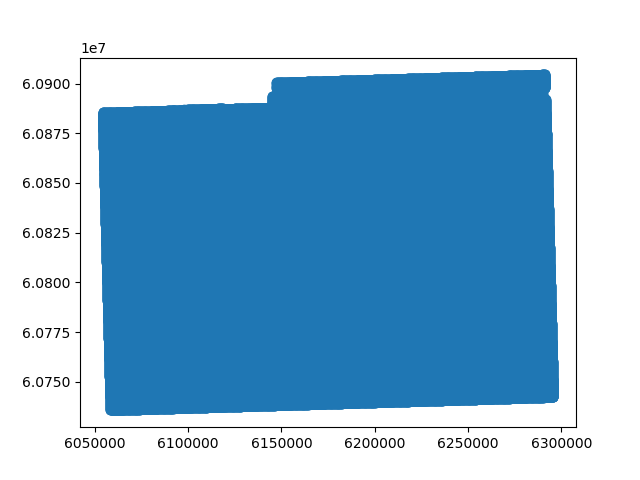

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(sx, sy)
plt.show()

## Writing SEG-Y file


Let's firstly write a function that writes the headers and data into a SEG-Y file. 


In [15]:
import struct

l_int = struct.calcsize('i')
l_uint = struct.calcsize('I')
#l_long = 4
# Next line gives wrong result on Linux!! (gives 8 instead of 4)
l_long = struct.calcsize('l')
l_ulong = struct.calcsize('L')
l_short = struct.calcsize('h')
l_ushort = struct.calcsize('H')
l_char = struct.calcsize('c')
l_uchar = struct.calcsize('B')
l_float = struct.calcsize('f')

SH_def = {"Job": {"pos": 3200, "type": "int32", "def": 0}}
SH_def["Line"] = {"pos": 3204, "type": "int32", "def": 0}
SH_def["Reel"] = {"pos": 3208, "type": "int32", "def": 0}
SH_def["DataTracePerEnsemble"] = {"pos": 3212, "type": "int16", "def": 0}
SH_def["AuxiliaryTracePerEnsemble"] = {"pos": 3214, "type": "int16", "def": 0}
SH_def["dt"] = {"pos": 3216, "type": "uint16", "def": 1000}
SH_def["dtOrig"] = {"pos": 3218, "type": "uint16", "def": 1000}
SH_def["ns"] = {"pos": 3220, "type": "uint16", "def": 0}
SH_def["nsOrig"] = {"pos": 3222, "type": "uint16", "def": 0}
SH_def["DataSampleFormat"] = {"pos": 3224, "type": "int16", "def": 5}

SH_def["DataSampleFormat"]["descr"] = {0: {
    1: "IBM Float",
    2: "32 bit Integer",
    3: "16 bit Integer",
    8: "8 bit Integer"}}

SH_def["DataSampleFormat"]["descr"][1] = {
    1: "IBM Float",
    2: "32 bit Integer",
    3: "16 bit Integer",
    4: "32 bit Fixed Point",
    5: "IEEE",
    8: "8 bit Integer"}

SH_def["DataSampleFormat"]["descr"][0] = { # added by Z Zhao
    1: "IBM Float",
    2: "32 bit Integer",
    3: "16 bit Integer",
    4: "32 bit Fixed Point"
    }

SH_def["DataSampleFormat"]["bps"] = {0: {
    1: 4,
    2: 4,
    3: 2,
    4: 4,
    8: 1}}
SH_def["DataSampleFormat"]["bps"][1] = {
    1: 4,
    2: 4,
    3: 2,
    4: 4,
    5: 4,
    8: 1}

SH_def["DataSampleFormat"]["bps"][0] = {  # added by Z Zhao
    1: 4,
    2: 4,
    3: 2,
    4: 4
    }   
SH_def["DataSampleFormat"]["datatype"] = {0: {
    1: 'ibm',
    2: 'l',
    3: 'h',
    8: 'B'}}
SH_def["DataSampleFormat"]["datatype"][1] = {
    1: 'ibm',
    2: 'l',
    3: 'h',
    #    5: 'float',
    5: 'f',
    8: 'B'}

SH_def["EnsembleFold"] = {"pos": 3226, "type": "int16", "def": 0}
SH_def["TraceSorting"] = {"pos": 3228, "type": "int16", "def": 0}
SH_def["VerticalSumCode"] = {"pos": 3230, "type": "int16", "def": 0}
SH_def["SweepFrequencyStart"] = {"pos": 3232, "type": "int16", "def": 0}
SH_def["SweepFrequencyEnd"] = {"pos": 3234, "type": "int16", "def": 0}
SH_def["SweepLength"] = {"pos": 3236, "type": "int16", "def": 0}
SH_def["SweepType"] = {"pos": 3238, "type": "int16", "def": 0}
SH_def["SweepChannel"] = {"pos": 3240, "type": "int16", "def": 0}
SH_def["SweepTaperlengthStart"] = {"pos": 3242, "type": "int16", "def": 0}
SH_def["SweepTaperLengthEnd"] = {"pos": 3244, "type": "int16", "def": 0}
SH_def["TaperType"] = {"pos": 3246, "type": "int16", "def": 0}
SH_def["CorrelatedDataTraces"] = {"pos": 3248, "type": "int16", "def": 0}
SH_def["BinaryGain"] = {"pos": 3250, "type": "int16", "def": 0}
SH_def["AmplitudeRecoveryMethod"] = {"pos": 3252, "type": "int16", "def": 0}
SH_def["MeasurementSystem"] = {"pos": 3254, "type": "int16", "def": 0}
SH_def["ImpulseSignalPolarity"] = {"pos": 3256, "type": "int16", "def": 0}
SH_def["VibratoryPolarityCode"] = {"pos": 3258, "type": "int16", "def": 0}
SH_def["Unassigned1"] = {"pos": 3260, "type": "int16", "n": 120, "def": 0}
SH_def["SegyFormatRevisionNumber"] = {"pos": 3500, "type": "uint16", "def": 100}
SH_def["FixedLengthTraceFlag"] = {"pos": 3502, "type": "uint16", "def": 0}
SH_def["NumberOfExtTextualHeaders"] = {"pos": 3504, "type": "uint16", "def": 0}
SH_def[" "] = {"pos": 3506, "type": "int16", "n": 47, "def": 0}

##############
# %%  Initialize SEGY TRACE HEADER SPECIFICATION
STH_def = {"TraceSequenceLine": {"pos": 0, "type": "int32"}}
STH_def["TraceSequenceFile"] = {"pos": 4, "type": "int32"}
STH_def["FieldRecord"] = {"pos": 8, "type": "int32"}
STH_def["TraceNumber"] = {"pos": 12, "type": "int32"}
STH_def["EnergySourcePoint"] = {"pos": 16, "type": "int32"}
STH_def["cdp"] = {"pos": 20, "type": "int32"}
STH_def["cdpTrace"] = {"pos": 24, "type": "int32"}
STH_def["TraceIdentificationCode"] = {"pos": 28, "type": "uint16"}  # 'int16'); % 28
STH_def["TraceIdentificationCode"]["descr"] = {0: {
    1: "Seismic data",
    2: "Dead",
    3: "Dummy",
    4: "Time Break",
    5: "Uphole",
    6: "Sweep",
    7: "Timing",
    8: "Water Break"}}
STH_def["TraceIdentificationCode"]["descr"][1] = {
    -1: "Other",
    0: "Unknown",
    1: "Seismic data",
    2: "Dead",
    3: "Dummy",
    4: "Time break",
    5: "Uphole",
    6: "Sweep",
    7: "Timing",
    8: "Waterbreak",
    9: "Near-field gun signature",
    10: "Far-field gun signature",
    11: "Seismic pressure sensor",
    12: "Multicomponent seismic sensor - Vertical component",
    13: "Multicomponent seismic sensor - Cross-line component",
    14: "Multicomponent seismic sensor - In-line component",
    15: "Rotated multicomponent seismic sensor - Vertical component",
    16: "Rotated multicomponent seismic sensor - Transverse component",
    17: "Rotated multicomponent seismic sensor - Radial component",
    18: "Vibrator reaction mass",
    19: "Vibrator baseplate",
    20: "Vibrator estimated ground force",
    21: "Vibrator reference",
    22: "Time-velocity pairs"}
STH_def["NSummedTraces"] = {"pos": 30, "type": "int16"}  # 'int16'); % 30
STH_def["NStackedTraces"] = {"pos": 32, "type": "int16"}  # 'int16'); % 32
STH_def["DataUse"] = {"pos": 34, "type": "int16"}  # 'int16'); % 34
STH_def["DataUse"]["descr"] = {0: {
    1: "Production",
    2: "Test"}}
STH_def["DataUse"]["descr"][1] = STH_def["DataUse"]["descr"][0]
STH_def["offset"] = {"pos": 36, "type": "int32"}  # 'int32');             %36
STH_def["ReceiverGroupElevation"] = {"pos": 40, "type": "int32"}  # 'int32');             %40
STH_def["SourceSurfaceElevation"] = {"pos": 44, "type": "int32"}  # 'int32');             %44
STH_def["SourceDepth"] = {"pos": 48, "type": "int32"}  # 'int32');             %48
STH_def["ReceiverDatumElevation"] = {"pos": 52, "type": "int32"}  # 'int32');             %52
STH_def["SourceDatumElevation"] = {"pos": 56, "type": "int32"}  # 'int32');             %56
STH_def["SourceWaterDepth"] = {"pos": 60, "type": "int32"}  # 'int32');  %60
STH_def["GroupWaterDepth"] = {"pos": 64, "type": "int32"}  # 'int32');  %64
STH_def["ElevationScalar"] = {"pos": 68, "type": "int16"}  # 'int16');  %68
STH_def["SourceGroupScalar"] = {"pos": 70, "type": "int16"}  # 'int16');  %70
STH_def["SourceX"] = {"pos": 72, "type": "int32"}  # 'int32');  %72
STH_def["SourceY"] = {"pos": 76, "type": "int32"}  # 'int32');  %76
STH_def["GroupX"] = {"pos": 80, "type": "int32"}  # 'int32');  %80
STH_def["GroupY"] = {"pos": 84, "type": "int32"}  # 'int32');  %84
STH_def["CoordinateUnits"] = {"pos": 88, "type": "int16"}  # 'int16');  %88
STH_def["CoordinateUnits"]["descr"] = {1: {
    1: "Length (meters or feet)",
    2: "Seconds of arc"}}
STH_def["CoordinateUnits"]["descr"][1] = {
    1: "Length (meters or feet)",
    2: "Seconds of arc",
    3: "Decimal degrees",
    4: "Degrees, minutes, seconds (DMS)"}
STH_def["WeatheringVelocity"] = {"pos": 90, "type": "int16"}  # 'int16');  %90
STH_def["SubWeatheringVelocity"] = {"pos": 92, "type": "int16"}  # 'int16');  %92
STH_def["SourceUpholeTime"] = {"pos": 94, "type": "int16"}  # 'int16');  %94
STH_def["GroupUpholeTime"] = {"pos": 96, "type": "int16"}  # 'int16');  %96
STH_def["SourceStaticCorrection"] = {"pos": 98, "type": "int16"}  # 'int16');  %98
STH_def["GroupStaticCorrection"] = {"pos": 100, "type": "int16"}  # 'int16');  %100
STH_def["TotalStaticApplied"] = {"pos": 102, "type": "int16"}  # 'int16');  %102
STH_def["LagTimeA"] = {"pos": 104, "type": "int16"}  # 'int16');  %104
STH_def["LagTimeB"] = {"pos": 106, "type": "int16"}  # 'int16');  %106
STH_def["DelayRecordingTime"] = {"pos": 108, "type": "int16"}  # 'int16');  %108
STH_def["MuteTimeStart"] = {"pos": 110, "type": "int16"}  # 'int16');  %110
STH_def["MuteTimeEND"] = {"pos": 112, "type": "int16"}  # 'int16');  %112
STH_def["ns"] = {"pos": 114, "type": "uint16"}  # 'uint16');  %114
STH_def["dt"] = {"pos": 116, "type": "uint16"}  # 'uint16');  %116
STH_def["GainType"] = {"pos": 119, "type": "int16"}  # 'int16');  %118
STH_def["GainType"]["descr"] = {0: {
    1: "Fixes",
    2: "Binary",
    3: "Floating point"}}
STH_def["GainType"]["descr"][1] = STH_def["GainType"]["descr"][0]
STH_def["InstrumentGainConstant"] = {"pos": 120, "type": "int16"}  # 'int16');  %120
STH_def["InstrumentInitialGain"] = {"pos": 122, "type": "int16"}  # 'int16');  %%122
STH_def["Correlated"] = {"pos": 124, "type": "int16"}  # 'int16');  %124
STH_def["Correlated"]["descr"] = {0: {
    1: "No",
    2: "Yes"}}
STH_def["Correlated"]["descr"][1] = STH_def["Correlated"]["descr"][0]

STH_def["SweepFrequenceStart"] = {"pos": 126, "type": "int16"}  # 'int16');  %126
STH_def["SweepFrequenceEnd"] = {"pos": 128, "type": "int16"}  # 'int16');  %128
STH_def["SweepLength"] = {"pos": 130, "type": "int16"}  # 'int16');  %130
STH_def["SweepType"] = {"pos": 132, "type": "int16"}  # 'int16');  %132
STH_def["SweepType"]["descr"] = {0: {
    1: "linear",
    2: "parabolic",
    3: "exponential",
    4: "other"}}
STH_def["SweepType"]["descr"][1] = STH_def["SweepType"]["descr"][0]

STH_def["SweepTraceTaperLengthStart"] = {"pos": 134, "type": "int16"}  # 'int16');  %134
STH_def["SweepTraceTaperLengthEnd"] = {"pos": 136, "type": "int16"}  # 'int16');  %136
STH_def["TaperType"] = {"pos": 138, "type": "int16"}  # 'int16');  %138
STH_def["TaperType"]["descr"] = {0: {
    1: "linear",
    2: "cos2c",
    3: "other"}}
STH_def["TaperType"]["descr"][1] = STH_def["TaperType"]["descr"][0]

STH_def["AliasFilterFrequency"] = {"pos": 140, "type": "int16"}  # 'int16');  %140
STH_def["AliasFilterSlope"] = {"pos": 142, "type": "int16"}  # 'int16');  %142
STH_def["NotchFilterFrequency"] = {"pos": 144, "type": "int16"}  # 'int16');  %144
STH_def["NotchFilterSlope"] = {"pos": 146, "type": "int16"}  # 'int16');  %146
STH_def["LowCutFrequency"] = {"pos": 148, "type": "int16"}  # 'int16');  %148
STH_def["HighCutFrequency"] = {"pos": 150, "type": "int16"}  # 'int16');  %150
STH_def["LowCutSlope"] = {"pos": 152, "type": "int16"}  # 'int16');  %152
STH_def["HighCutSlope"] = {"pos": 154, "type": "int16"}  # 'int16');  %154
STH_def["YearDataRecorded"] = {"pos": 156, "type": "int16"}  # 'int16');  %156
STH_def["DayOfYear"] = {"pos": 158, "type": "int16"}  # 'int16');  %158
STH_def["HourOfDay"] = {"pos": 160, "type": "int16"}  # 'int16');  %160
STH_def["MinuteOfHour"] = {"pos": 162, "type": "int16"}  # 'int16');  %162
STH_def["SecondOfMinute"] = {"pos": 164, "type": "int16"}  # 'int16');  %164
STH_def["TimeBaseCode"] = {"pos": 166, "type": "int16"}  # 'int16');  %166
STH_def["TimeBaseCode"]["descr"] = {0: {
    1: "Local",
    2: "GMT",
    3: "Other"}}
STH_def["TimeBaseCode"]["descr"][1] = {
    1: "Local",
    2: "GMT",
    3: "Other",
    4: "UTC"}
STH_def["TraceWeightningFactor"] = {"pos": 168, "type": "int16"}  # 'int16');  %170
STH_def["GeophoneGroupNumberRoll1"] = {"pos": 170, "type": "int16"}  # 'int16');  %172
STH_def["GeophoneGroupNumberFirstTraceOrigField"] = {"pos": 172, "type": "int16"}  # 'int16');  %174
STH_def["GeophoneGroupNumberLastTraceOrigField"] = {"pos": 174, "type": "int16"}  # 'int16');  %176
STH_def["GapSize"] = {"pos": 176, "type": "int16"}  # 'int16');  %178
STH_def["OverTravel"] = {"pos": 178, "type": "int16"}  # 'int16');  %178
STH_def["OverTravel"]["descr"] = {0: {
    1: "down (or behind)",
    2: "up (or ahead)",
    3: "other"}}
STH_def["OverTravel"]["descr"][1] = STH_def["OverTravel"]["descr"][0]

STH_def["cdpX"] = {"pos": 180, "type": "int32"}  # 'int32');  %180
STH_def["cdpY"] = {"pos": 184, "type": "int32"}  # 'int32');  %184
STH_def["Inline3D"] = {"pos": 188, "type": "int32"}  # 'int32');  %188
STH_def["Crossline3D"] = {"pos": 192, "type": "int32"}  # 'int32');  %192
STH_def["ShotPoint"] = {"pos": 192, "type": "int32"}  # 'int32');  %196
STH_def["ShotPointScalar"] = {"pos": 200, "type": "int16"}  # 'int16');  %200
STH_def["TraceValueMeasurementUnit"] = {"pos": 202, "type": "int16"}  # 'int16');  %202
STH_def["TraceValueMeasurementUnit"]["descr"] = {1: {
    -1: "Other",
    0: "Unknown (should be described in Data Sample Measurement Units Stanza) ",
    1: "Pascal (Pa)",
    2: "Volts (V)",
    3: "Millivolts (v)",
    4: "Amperes (A)",
    5: "Meters (m)",
    6: "Meters Per Second (m/s)",
    7: "Meters Per Second squared (m/&s2)Other",
    8: "Newton (N)",
    9: "Watt (W)"}}
STH_def["TransductionConstantMantissa"] = {"pos": 204, "type": "int32"}  # 'int32');  %204
STH_def["TransductionConstantPower"] = {"pos": 208, "type": "int16"}  # 'int16'); %208
STH_def["TransductionUnit"] = {"pos": 210, "type": "int16"}  # 'int16');  %210
STH_def["TransductionUnit"]["descr"] = STH_def["TraceValueMeasurementUnit"]["descr"]
STH_def["TraceIdentifier"] = {"pos": 212, "type": "int16"}  # 'int16');  %212
STH_def["ScalarTraceHeader"] = {"pos": 214, "type": "int16"}  # 'int16');  %214
STH_def["SourceType"] = {"pos": 216, "type": "int16"}  # 'int16');  %216
STH_def["SourceType"]["descr"] = {1: {
    -1: "Other (should be described in Source Type/Orientation stanza)",
    0: "Unknown",
    1: "Vibratory - Vertical orientation",
    2: "Vibratory - Cross-line orientation",
    3: "Vibratory - In-line orientation",
    4: "Impulsive - Vertical orientation",
    5: "Impulsive - Cross-line orientation",
    6: "Impulsive - In-line orientation",
    7: "Distributed Impulsive - Vertical orientation",
    8: "Distributed Impulsive - Cross-line orientation",
    9: "Distributed Impulsive - In-line orientation"}}

STH_def["SourceEnergyDirectionMantissa"] = {"pos": 218, "type": "int32"}  # 'int32');  %218
STH_def["SourceEnergyDirectionExponent"] = {"pos": 222, "type": "int16"}  # 'int16');  %222
STH_def["SourceMeasurementMantissa"] = {"pos": 224, "type": "int32"}  # 'int32');  %224
STH_def["SourceMeasurementExponent"] = {"pos": 228, "type": "int16"}  # 'int16');  %228
STH_def["SourceMeasurementUnit"] = {"pos": 230, "type": "int16"}  # 'int16');  %230
STH_def["SourceMeasurementUnit"]["descr"] = {1: {
    -1: "Other (should be described in Source Measurement Unit stanza)",
    0: "Unknown",
    1: "Joule (J)",
    2: "Kilowatt (kW)",
    3: "Pascal (Pa)",
    4: "Bar (Bar)",
    4: "Bar-meter (Bar-m)",
    5: "Newton (N)",
    6: "Kilograms (kg)"}}
STH_def["UnassignedInt1"] = {"pos": 232, "type": "int32"}  # 'int32');  %232
STH_def["UnassignedInt2"] = {"pos": 236, "type": "int32"}  # 'int32');  %236

def putValue(value, fileid, index, ctype='l', endian='>', number=1):
    """
    putValue(data,index,ctype,endian,number)
    """
    if (ctype == 'l') | (ctype == 'long') | (ctype == 'int32'):
        size = l_long
        ctype = 'l'
        value=int(value)
    elif (ctype == 'L') | (ctype == 'ulong') | (ctype == 'uint32'):
        size = l_ulong
        ctype = 'L'
        value=int(value)
    elif (ctype == 'h') | (ctype == 'short') | (ctype == 'int16'):
        size = l_short
        ctype = 'h'
        value=int(value)
    elif (ctype == 'H') | (ctype == 'ushort') | (ctype == 'uint16'):
        size = l_ushort
        ctype = 'H'
        value=int(value)
    elif (ctype == 'c') | (ctype == 'char'):
        size = l_char
        ctype = 'c'
    elif (ctype == 'B') | (ctype == 'uchar'):
        size = l_uchar
        ctype = 'B'
    elif (ctype == 'f') | (ctype == 'float'):
        size = l_float
        ctype = 'f'
    elif (ctype == 'ibm'):
        size = l_float
    else:
        printverbose('Bad Ctype : ' + ctype, -1)

    cformat = endian + ctype * number

    
    strVal = struct.pack(cformat, value)
    fileid.seek(index)
    fileid.write(strVal)

    return 1

In [16]:
def writeSegy(filename,Data,  VH, TH, TFH = '', rev = 1, dsf = 5, endian='>'):  
        
    """        

    Write the SEG-Y data  to a standard Rev1 SEG-Y file with .sgy as its suffix.

    :param filename: absulute file path of the dict file to be written down.
    :type filename: str.       


    :param VH: dictionary containing binary volume header info.
    :type VH: dict.

    :param TH: dictionary containing binary trace header info.
    :type TH: dict.

    :param TFH: textual file header info.
    :type TFH: str.

    :param rev: SEG-Y revison number.
    :type rev: int.

    :param dsf: data sample format, 5 = 32-bit floating point.
    :type dsf: int.

    :param filename: endian setting for the file to be written down, with little endian as '<' and big endian as '>'.
    :type filename: str.

    """  

    VH['SegyFormatRevisionNumber'] = rev
    ntraces = Data.shape[1]

    f = open(filename, 'wb')     

    # Write SEGY textual file header (3200 bytes)
    f.seek(0)
    import ebcdic
    f.write(TFH.encode('cp1141'))

    # Write SEGY binary header (400 bytes)

    for key in SH_def.keys():

        if key in VH.keys():
            pos = SH_def[key]["pos"]
            format = SH_def[key]["type"]
            value = VH[key]

            #  SegyHeader[key],index = putValue(value,f,pos,format,endian);
            putValue(value, f, pos, format, endian)




    # Write SEGY traces

    ctype = SH_def['DataSampleFormat']['datatype'][rev][dsf]
    bps = SH_def['DataSampleFormat']['bps'][rev][dsf]

    sizeT = 240 + VH['ns'] * bps        


    for itrace in range(ntraces):
        index = 3600 + itrace * sizeT

        # Write trace header
        for key in STH_def.keys():
            pos = index + STH_def[key]["pos"]
            format = STH_def[key]["type"]
            value = TH[key][itrace]                

            putValue(value, f, pos, format, endian)

        # Write trace data            
        # method 1: using numpy tobytes, high speed
        cformat = endian + ctype * VH['ns']
        arr = Data[:, itrace].tolist()
        #arr_bytes = arr.tobytes('C')
        strVal = struct.pack(cformat, *arr)
        f.seek(index + 240)
        f.write(strVal)          


    f.close()

In [17]:
outputfile = os.path.join(ROOT, 'F3/rewritten.sgy')
print('Writing SEG-Y file in progress...')
writeSegy(outputfile, traces, volume_header, trace_header)
print('SEG-Y file saved successfully.')

Writing SEG-Y file in progress...
SEG-Y file saved successfully.


We may use the function 'readSegy' to read in the saved SEG-Y file to double-check if it's correctly stored or not.

In [18]:
traces, volume_header, trace_header = readSegy(outputfile)

print('\nTotal number of traces: ', traces.shape[1])
print('\nNumber of samples per trace: ', traces.shape[0])

600515 record read.

Total number of traces:  600515

Number of samples per trace:  463
